In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, display_html
from tqdm import tqdm

In [3]:
import sys
sys.path.append("..")
from rllib.student import student
from rllib.dp import dp
from rllib.linear_solver import linear_solver
from rllib import misc

# define student MDP

In [4]:
o = student()

## check R

In [5]:
df = pd.DataFrame(o.R, columns=o.A, index=o.S)
df.style.apply(misc.color_positive_green, mask=o.R, axis=None).format(precision=2)

,facebook,quit,study,sleep,pub,other
class1,-1.00,0.00,-2.00,0.00,0.00,0.00
class2,0.00,0.00,-2.00,0.00,0.00,0.00
class3,0.00,0.00,10.00,0.00,1.00,0.00
fb,-1.00,0.00,0.00,0.00,0.00,0.00
sleeping,0.00,0.00,0.00,0.00,0.00,0.00


In [7]:
np.einsum('sa,sa->s', o.Π, o.R)

array([-1.5, -1. ,  5.5, -0.5,  0. ])

# Compute V(s)

In [8]:
gamma = 1.0

In [9]:
hist = []
V = np.zeros(len(o.S))
hist.append(V)
for i in range(20):
    V = dp.compute_v_π(o, V, gamma)
    hist.append(V)

In [10]:
V

array([-1.31756435,  2.69112472,  7.38266091, -2.32282241,  0.        ])

In [11]:
df = pd.DataFrame(hist, columns=o.S)

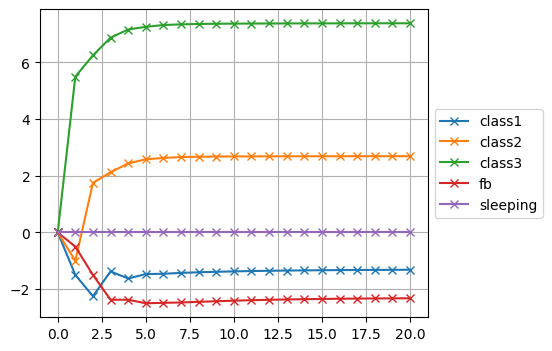

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))

df.plot(marker='x', ax=ax)
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()